In [1]:
import numpy as np
import matplotlib.pyplot as plt
from odes import euler

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño




Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 5.1 Método de Euler

### 5.1.1 Explicación

$$\frac{dy}{dx} = f(x, y)$$

$$y(x_0) = y_0$$

En el método de Euler, se utiliza la primera derivada de la función para estimar la pendiente de la función en $x_i$.

$$y_{i+1} = y_i + \phi(x_i, y_i)h$$

donde $\phi(x_i, y_i)$ se le llama función de incremento, y se intepreta como una representación de la pendiente de la curva sobre un intervalo dado. Para el método de Euler toma la forma:

$$\phi(x_i, y_i) = \left.\frac{dy}{dx}\right|_{x_i,y_i} = f(x_i, y_i)$$

<details>
<summary><b>Derivación</b></summary>

<div class="class alert-info">

**Escritura de la derivada como una diferencia finita**:

$$\left. \frac{dy}{dx} \right|_{x=x_i} \approx \frac{y_{i+1} - y_{i}}{h}$$

**Manipulación algebraica**:

$$y_{i+1} = y_i +  \left. \frac{dy}{dx} \right|_{x=x_i} h$$

$$y_{i+1} = y_i + \underbrace{f(x_i, y_i)}_{\frac{dy}{dx}} h$$


</div>

</details>

**Implementación del método de Euler**

In [2]:
help(euler)

Help on function euler in module odes:

euler(f, y0, x_span, h)
    Implementación básica del método de Euler para resolver
    una ecuación diferencial ordinaria.
    
    Parameters
    ----------
    
    f : function
        Python function return a number. `f` must e continuous.
    y0: scalar
        initial condition f(0)= y0
    x_span: tupple
        two-value tupple with the initial and final xvalues, (x0,xf)
        for evaluation of the function.
    h : scalar
        step-size in the x-direction
    
    Returns
    -------
    X : array
        x-values where the differential equation is evaluated.
    Y : array
        y-values where the differential equation is evaluated.



### 5.1.2 Ejemplo

Utilice el método de Euler para integrar numéricamente la ecuación:

$$\frac{dy}{dx} = -2 x^3 + 12 x^2 - 20 x + 8.5$$

en el rango $x=[0, 4]$, y con la condición inicial $x_0, y_0 = [0, 1]$.

Estudie el efecto de tamaño de paso, empezando desde $h=0.5$.



In [3]:
def f(x, y=None):
    return -2*x**3 + 12*x**2 - 20*x + 8.5

Compare sus resultados contra la solución exacta, que esta dada por:

$$y = -0.5 x^4 + 4 x^3 - 10 x^2 + 8.5 x + 1$$

In [4]:
def F(x, y=None):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

**Aplicación del método de Euler**

In [14]:
x_span = (0, 4)
y0 = 1

# Aplicando método a diferentes tamaños de paso
X50, Y50 = euler(f, y0, x_span, h=0.5)
X25, Y25 = euler(f, y0, x_span, h=0.25) 
X10, Y10 = euler(f, y0, x_span, h=0.10) 

In [15]:
Y50

array([1.   , 5.25 , 5.875, 5.125, 4.5  , 4.75 , 5.875, 7.125, 7.   ])

**Análisis gráfico**

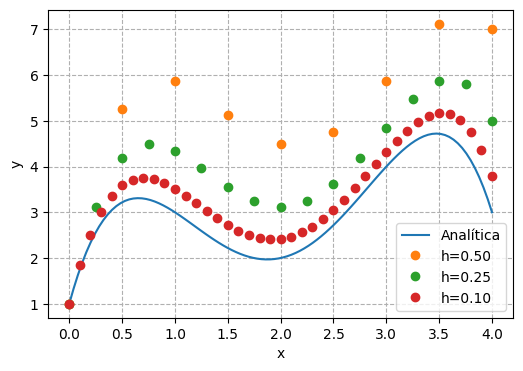

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
x = np.linspace(0, 4, 100)
ax.plot(x, F(x), label='Analítica')
ax.plot(X50, Y50, ls='', marker='o', label='h=0.50')
ax.plot(X25, Y25, ls='', marker='o', label='h=0.25')
ax.plot(X10, Y10, ls='', marker='o', label='h=0.10')
ax.legend()
ax.set(xlabel='x', ylabel='y')
ax.grid(ls='--')
plt.show()

**Análisis del error**

In [8]:
print(f"x\ty(true)\t\ty(Euler)\terror(%)")
for xi, yi in zip(X50, Y50):
    et = 100*abs((F(xi) - yi)/F(xi))
    print(f"{xi:.2f}\t{F(xi):.5f}\t\t{yi:.5f}\t\t{et:.2f}")

x	y(true)		y(Euler)	error(%)
0.00	1.00000		1.00000		0.00
0.50	3.21875		5.25000		63.11
1.00	3.00000		5.87500		95.83
1.50	2.21875		5.12500		130.99
2.00	2.00000		4.50000		125.00
2.50	2.71875		4.75000		74.71
3.00	4.00000		5.87500		46.88
3.50	4.71875		7.12500		50.99
4.00	3.00000		7.00000		133.33


**Pregunta:**

¿Cómo se puede reducir el error del método de Euler?


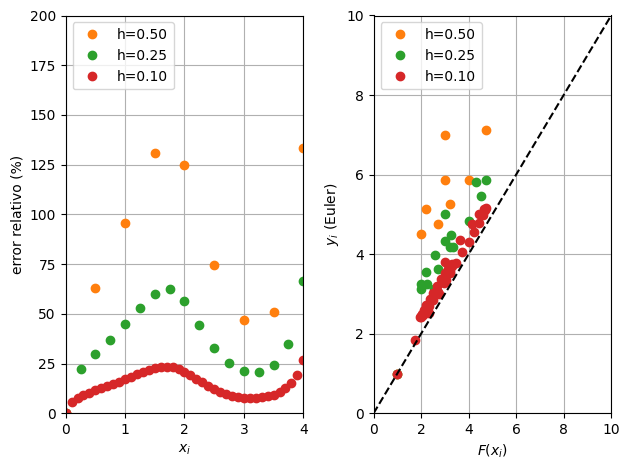

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2)


# cálculo errores
E50 = 100*abs(F(X50) - Y50)/F(X50)
E25 = 100*abs(F(X25) - Y25)/F(X25)
E10 = 100*abs(F(X10) - Y10)/F(X10)


ax1.plot(X50, E50, ls='', marker='o', c="C1", label="h=0.50")
ax1.plot(X25, E25, ls='', marker='o', c="C2", label="h=0.25")
ax1.plot(X10, E10, ls='', marker='o', c="C3", label="h=0.10")
ax1.set(
    xlim=(0, 4),
    xlabel=r"$x_{i}$",
    ylim=(0, 200),
    ylabel=r"error relativo (%)"
)
ax1.grid()
ax1.legend(loc="upper left")

ax2.plot(F(X50), Y50, ls='', marker='o', c="C1", label="h=0.50")
ax2.plot(F(X25), Y25, ls='', marker='o', c="C2", label="h=0.25")
ax2.plot(F(X10), Y10, ls='', marker='o', c="C3", label="h=0.10")
ax2.plot([0,10], [0, 10], ls='--', color='k')
ax2.set(
    xlim=(0,10),
    xlabel=r"$F(x_{i})$",
    ylim=(0,10),
    ylabel=r"$y_{i}$ (Euler)"
)
ax2.grid()
ax2.legend(loc="upper left")

fig.tight_layout()
plt.show()